In [1]:
# Install ANNOY
!pip install annoy

     ---------------------------------------- 0.0/647.5 kB ? eta -:--:--
     -------------------------------------- 647.5/647.5 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-win_amd64.whl size=53188 sha256=124a883eab23ac9e7e3e6fcb9539a489388d67c179aa5b80c62a3ed8454a7115
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\db\b9\53\a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [2]:
# STEP 2 - IMPORT LIBRARY

# Import Library
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

In [3]:
# STEP 3 - CREATE DUMMY DATASET
# Build Random Dataset and Query Point
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # random value at 100x100 space

# Query point (pick 1 random data point)
query = X[np.random.randint(0, n_points)]

In [4]:
# STEP 4 - EXACT NN

# Compute Exact NN Using Brute Force
# It will visit the data one by one
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 1.0042 ms


In [5]:
# STEP 5 - NEAREST NEIGHBORS WITH ANNOY

# ANNOY 3 Tree
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # find 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")


Annoy NN index: [219, 898, 593]
Annoy NN jarak: [0.0, 1.369159376273702, 2.2793154441691197]
Waktu Annoy: 0.0 ms


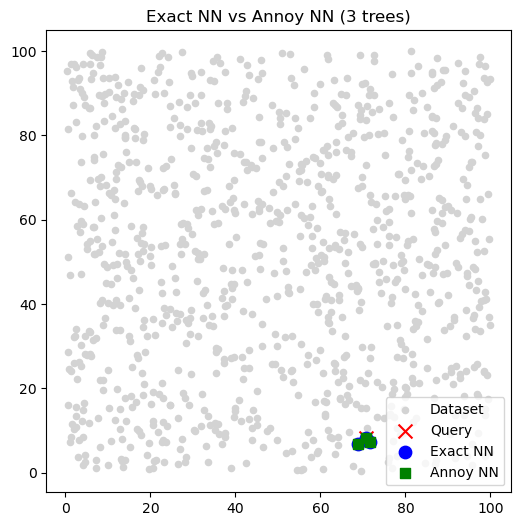

In [6]:
# STEP 6 - VISUALIZE THE NN RESULT 

# Visualize
# Knowing the NN produced by Exact NN and ANNOY
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

The green square is directly on top of the blue circle despite being an approximation, successfully found the exact same nearest neighbor as the much slower brute-force method. This demonstrates the effectiveness of approximate nearest neighbor algorithms, they can provide the correct answer (or one extremely close to it) in a fraction of the time.